#### Problem Tutorial 1: Regression Model

We want to predict the gas consumption (in millions of gallons/year) in 48 of the US states
based on some key features. 

These features are 
 * petrol tax (in cents); 
 * per capital income (in US dollars);
 * paved highway (in miles); and
 * population of people with driving licences

<table>
  <tr><td>
    <img src="https://informedinfrastructure.com/wp-content/uploads/2012/06/traffic-jam.jpg"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td></td></tr>
  <tr><td>
  <img src="https://miro.medium.com/max/593/1*pfmeGgGM5sxmLBQ5IQfQew.png"
         alt="Matrix" width="600">
  <tr><td></td></tr>
  <tr><td>And seems like a bad consumption problem to have ...</td></tr>
</table>
  
#### Solution:

Since this is a regression problem where the value is a range of numbers, we can use the
common Random Forest Algorithm in Scikit-Learn. Most regression models are evaluated with
four [standard evalution metrics](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4): 

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RSME)
* R-squared (r2)

This example is borrowed from this [source](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/) and modified and modularized for this tutorial

Aim of this this:

1. Understand MLflow Tracking API
2. How to use the MLflow Tracking API
3. Use the MLflow API to experiment several Runs
4. Interpret and observe runs via the MLflow UI

Some Resources:
* https://mlflow.org/docs/latest/python_api/mlflow.html
* https://www.saedsayad.com/decision_tree_reg.htm
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914
* https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Define all the classes and bring them into scope

In [0]:
%run ./setup/class_setup

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame

Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

### Load the Dataset

In [0]:
# load and print dataset
dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/petrol_consumption.csv")
dataset.head(5)

---------------------------------------------------------------------------
NameError Traceback (most recent call last)
 in 
 1 # load and print dataset
----> 2 dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/petrol_consumption.csv")
 3 dataset.head(5)

NameError: name 'Utils' is not defined

Get descriptive statistics for the features

In [0]:
dataset.describe()

---------------------------------------------------------------------------
NameError Traceback (most recent call last)
 in 
----> 1 dataset.describe()

NameError: name 'dataset' is not defined

----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id f83fc388411a498da83539be9b9530fa and experiment_id 2387317862617790
Estimator trees : 20
Mean Absolute Error : 48.927943553475274
Mean Squared Error : 3770.1618209759376
Root Mean Squared Error: 61.4016434712943
R2 : 0.35656618704587173
2
MLflow Run completed with run_id f83fc388411a498da83539be9b9530fa and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 970db4006405426fac9b6559b14eef00 and experiment_id 2387317862617790
Estimator trees : 30
Mean Absolute Error : 43.68565749990749
Mean Squared Error : 3067.6681918322124
Root Mean Squared Error: 55.38653439088072
R2 : 0.47645710309650546
4
MLflow Run completed with run_id 970db4006405426fac9b6559b14eef00 and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 582c3206b8774c7b8fe330640f21b063 and experiment_id 2387317862617790
Estimator trees : 40
Mean Absolute Error : 54.325774350649354
Mean Squared Error : 4129.625444587267
Root Mean Squared Error: 64.26216184184335
R2 : 0.29521840916755393
6
MLflow Run completed with run_id 582c3206b8774c7b8fe330640f21b063 and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 53d9c48379d74d5aad5f4c4ca5558262 and experiment_id 2387317862617790
Estimator trees : 50
Mean Absolute Error : 47.67230476190478
Mean Squared Error : 3300.095574380047
Root Mean Squared Error: 57.44645832755965
R2 : 0.43678993651610953
8
MLflow Run completed with run_id 53d9c48379d74d5aad5f4c4ca5558262 and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id d1de28eece1341b2927d3494d81c05a9 and experiment_id 2387317862617790
Estimator trees : 60
Mean Absolute Error : 50.97555555555556
Mean Squared Error : 3617.2376790123467
Root Mean Squared Error: 60.14347578093859
R2 : 0.3826649510853688
10
MLflow Run completed with run_id d1de28eece1341b2927d3494d81c05a9 and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 240428f6439c47e9823672a205cb4415 and experiment_id 2387317862617790
Estimator trees : 70
Mean Absolute Error : 49.89142857142856
Mean Squared Error : 3706.816653061224
Root Mean Squared Error: 60.88363206200189
R2 : 0.3673769757756332
12
MLflow Run completed with run_id 240428f6439c47e9823672a205cb4415 and experiment_id 2387317862617790
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 7d66de1a297a4644a7bf918d88faf53e and experiment_id 2387317862617790
Estimator trees : 80
Mean Absolute Error : 49.39625000000001
Mean Squared Error : 3745.7554843750004
Root Mean Squared Error: 61.202577432449694
R2 : 0.3607314889520158
14
MLflow Run completed with run_id 7d66de1a297a4644a7bf918d88faf53e and experiment_id 2387317862617790
--------------------------------------------------------------------------------------------------

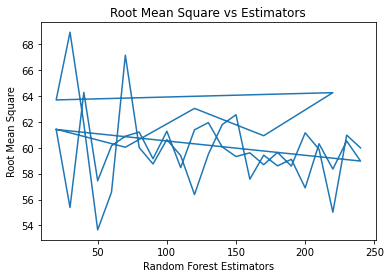

In [0]:
# iterate over several runs with different parameters, such as number of trees. 
# For expermientation, try max_depth and consult the documentation what tunning parameters
# may affect a better outcome.
max_depth = 0
for n in range (20, 250, 10):
  max_depth = max_depth + 2
  params = {"n_estimators": n, "max_depth": max_depth}
  rfr = RFRModel.new_instance(params)
  (experimentID, runID) = rfr.mlflow_run(dataset)
  print(f"{max_depth}")
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

**Note**:

With 20 trees, the root mean squared error is `64.93`, which is greater than 10 percent of the average petrol consumption i.e., `576.77`. 
This may sugggest that we have not used enough estimators (trees).

### Let's Explorethe MLflow  UI

* Add Notes & Tags
* Compare Runs pick two best runs
* Annotate with descriptions and tags
* Evaluate the best run

#### Homework Assignment. Try different runs with:
1. Change the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)
    * compare the evaluation metrics and ascertain which one is better
2. Change or add parameters, such as depth of the tree or random_state: 42 etc.
3. Change or alter the range of runs and increments of n_estimators
4. Check in MLfow UI if the metrics are affected
5. Convert your machine learning model code from work, use MLflow APIs to track your experiment
6. Explore the [MLflow GitHub Examples](https://mlflow.org/docs/latest/tutorials-and-examples/index.html)